In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy import isnan
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression 
import math as m
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV


Question1

In [2]:
dataT=pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")   ## training data reading 
x_d= dataT.iloc[:,:-2]                                                          ## x train variables 
y_d= dataT.iloc[:,78:]                                                    #  y_train of   multi class
y_d1= dataT.iloc[:,77:78]                                         # y_train1 of binary class
test_D=pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")       ## testing data reading
x_T=test_D.iloc[:,:-2]                                                          ## x test for input
y_T= test_D.iloc[:,77:78]                                          ##  y test  binary class 
y_T1=test_D.iloc[:,78:]                                           #  y_test1 for multiclass 

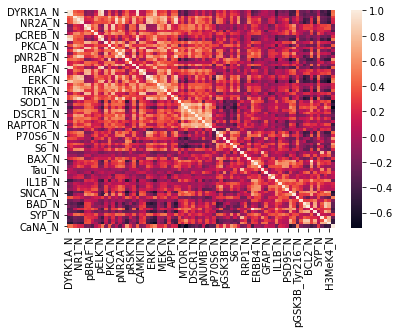

In [3]:
sns.heatmap(dataT.corr())   ##correlation matrix using seaborn 

In [4]:
crr1=x_d.corr().abs()   ## absolute of correlation matrix
crr2=np.array(crr1)      ## converting it to array

In [5]:
corr_matrix = x_d.corr().abs()           # Creating correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))          # Selecting  upper triangle of correlation matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]         # Finding the index of feature columns with correlation greater than 0.95
# Drop features 
tr_D= x_d.drop(x_d[to_drop], axis=1)
test_D= x_T.drop(x_T[to_drop],axis=1)
##print(tr_D)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [6]:
    ##imputing the training and test  variables using iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(tr_D)
# the model learns that the second feature is double the first
IterativeImputer(random_state=0)     # for the training data
imp_xd= (imp.transform(tr_D))
imp1 = IterativeImputer(max_iter=10, random_state=0)
imp1.fit(test_D)
IterativeImputer(random_state=0)     # for the test data
imp_xt= (imp1.transform(test_D))


In [7]:
## logistic regression
## training the values with multi and binary classification output 
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(imp_xd)
xtest = sc_x.transform(imp_xt)
classifier = LogisticRegressionCV(random_state = 0,max_iter=4000,cv=5)
## for multi class
x_t = classifier.fit(imp_xd,y_d)
xd_pred = x_t.predict(imp_xd)      # x_train
xt_pred = x_t.predict(imp_xt)     # x_test
## for binary class
x_t1 = classifier.fit(imp_xd,y_d1)
xd1_pred = x_t1.predict(imp_xd)      # x_train
xt1_pred = x_t1.predict(imp_xt)     # x_test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
## calculating f1 score

## for multi class
xd_multi = f1_score(y_d, xd_pred, average= 'macro')
xt_multi =f1_score(y_T1, xt_pred, average= 'macro')
## for binary class 
xd_bin = f1_score(y_d1, xd1_pred, average= 'macro')
xt_bin = f1_score(y_T, xt1_pred, average= 'macro')
print(xd_multi)
print(xt_multi)
print(xd_bin)
print(xt_bin)

0.9975
0.7742304328044367
0.9745049526744443
0.7801200614267765


In [9]:
from sklearn.svm import SVC

##################FOR MULTI CLASSIFIERS#########
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(imp_xd, y_d)
  
prediction = svc_model .predict(imp_xt)
# check the accuracy on the training set
print(svc_model.score(imp_xd, y_d))
print(svc_model.score(imp_xt, y_T1))

0.889763779527559
0.6888888888888889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(imp_xd, np.ravel(y_d))   # fitting the model for grid search
print(grid.best_params_)        # print best parameter after tuning
print(grid.best_estimator_)      # print how our model looks after hyper-parameter tuning
grid_predictions = grid.predict(imp_xt)   ## predicting the input values from the test data
print(classification_report(y_T1, grid_predictions))        # print classification report
xt_multi =f1_score(y_T1, grid_predictions, average= 'macro')    ##f1 score for multiclassifiers

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.428 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.461 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.592 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.588 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [11]:
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# bin = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# # fitting the model for grid search
# bin.fit(imp_xd, np.ravel(y_d1))
# # print best parameter after tuning
# print(bin.best_params_)
# # print how our model looks after hyper-parameter tuning
# print(bin.best_estimator_)
# bin_predictions = bin.predict(imp_xt)
# # print classification report
# print(classification_report(y_T, bin_predictions))
# xt1_multi =f1_score(y_T, bin_predictions, average= 'macro')
# xt1_multi

##################FOR BINARY CLASSIFIERS#########
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(imp_xd, np.ravel(y_d1))   # fitting the model for grid search
print(grid.best_params_)        # print best parameter after tuning
print(grid.best_estimator_)      # print how our model looks after hyper-parameter tuning
bin_predictions = grid.predict(imp_xt)   ## predicting the input values from the test data
print(classification_report(y_T, bin_predictions))        # print classification report
xt1_multi =f1_score(y_T, bin_predictions, average= 'macro')    ##f1 score for binary classifiers
xt1_multi

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.438 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.441 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.546 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

0.8369039948453608

In [12]:
## Neural Network with single ReLU hidden layer and Softmax output
## MLP classifier on multi and binary classification 

## defining various parameters for mlp classfiers 
mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
mlpc = MLPClassifier(random_state = 0,max_iter=4000) # ANN model object created

# Model CV process 
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                         cv = 5,  # To make a 5-fold CV
                          n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level osf detail: higher means more messages gets value as integer.

mlpc_cv_model.fit(imp_xd, y_d) 
print("The best parameters: " + str(mlpc_cv_model.best_params_))    # The best parameter obtained as a result of CV process

mlpc_tuned = mlpc_cv_model.best_estimator_                # Model Tuning and Setting the Final Model with the best parameter
## for multiclass
mlpc_tuned.fit(imp_xd,np.ravel(y_d))                # Fitting Final Model
# K-fold f1_weighted
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K fold
kf = KFold(shuffle=True, n_splits=5)   # To make a 5-fold CV
cv_results_kfold = cross_val_score(mlpc_tuned, imp_xt,np.ravel(y_T1), cv=kf, scoring= 'f1_weighted')
print("K-fold Cross Validation f1_weigted Results: ",cv_results_kfold)
print("K-fold Cross Validation f1_weigted Results Mean: ",cv_results_kfold.mean())

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'lbfgs'}
K-fold Cross Validation f1_weigted Results:  [1. 1. 1. 1. 1.]
K-fold Cross Validation f1_weigted Results Mean:  1.0


In [13]:
          # Fitting Final Model    for binary class
mlpc_tuned.fit(imp_xd,np.ravel(y_d1))
           # K-fold f1_weighted
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
          # K fold
kf = KFold(shuffle=True, n_splits=5)                      # To make a 5-fold CV
cv_results_kfold = cross_val_score(mlpc_tuned, imp_xt,np.ravel(y_T), cv=kf, scoring= 'f1_weighted')
print("K-fold Cross Validation f1_weigted Results: ",cv_results_kfold)
print("K-fold Cross Validation f1_weigted Results Mean: ",cv_results_kfold.mean())


K-fold Cross Validation f1_weigted Results:  [1. 1. 1. 1. 1.]
K-fold Cross Validation f1_weigted Results Mean:  1.0


In [14]:
## RANDOM FOREST for multi class and binary class
## for multiple class
rfc= RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV (estimator= rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(imp_xd, np.ravel(y_d))
mul= CV_rfc.predict(imp_xd)

In [15]:
mul_forest =f1_score(y_d, mul , average= 'macro')     ## f1 score calculation

In [16]:
## for binary class training data
CV_rfc.fit(imp_xd, np.ravel(y_d1))
mul1= CV_rfc.predict(imp_xd)
mul_forest1 =f1_score(y_d1, mul1 , average= 'macro')
mul_forest1

0.990599539317506

In [17]:
## for binary class testing  data
CV_rfc.fit(imp_xt, np.ravel(y_T))
mul2= CV_rfc.predict(imp_xt)
mul_forest2 =f1_score(y_T, mul2 , average= 'macro')
mul_forest2


1.0

In [18]:
## for multiple class testing data
CV_rfc.fit(imp_xt, np.ravel(y_T1))
mul3= CV_rfc.predict(imp_xt)
mul_forest3 =f1_score(y_T1, mul3 , average= 'macro')
mul_forest3

1.0

In [25]:
## RFECV CLASSIFIER
selector1 = RFECV(classifier, step=10, cv=2)
selector1 = selector1.fit(imp_xd, np.ravel(y_d1))

In [27]:
xd_pred23 =selector1.predict(imp_xd)   ## PREDICTING THE DATA

In [30]:
f1_score(y_d1, xd_pred23, average= 'macro')     ##F1 score 

0.7370089950171488

In [31]:
selector2 = RFECV(classifier, step=10, cv=2)## for the binary data
selector2 = selector2.fit(imp_xd, np.ravel(y_d))

In [32]:
xd_pred24 =selector2.predict(imp_xd) ##predicting the data

In [33]:
f1_score(y_d,xd_pred24 , average= 'macro')  ##f1 score 

0.5822665215177825

OBSERVATIONS:

1.the given data set contains two classifications i.e binary class and multi class
2. Logistic regrassion----f1 score
-- for multi class i have got for testing data 77%

-- for binary class i have got for testing data 78%
3. MLP classifier 

RESOURCES :
1.https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv/notebook
2.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
3.https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
4.https://analyticsindiamag.com/evaluation-metrics-in-ml-ai-for-classification-problems-wpython-code/
5.https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/
6.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
7.https://www.geeksforgeeks.org/support-vector-machine-algorithm/
8.https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
9.https://stackoverflow.com/questions/16078818/calculating-gradient-with-numpy
10.https://scikit-learn.org/stable/modules/impute.html

i have discussed with sasikiran reddy(213079025)
